In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import folium
from folium import plugins

In [3]:
data = pd.read_csv('fire_nrt_V1_96617.csv')
sample_data = data.iloc[np.random.choice(data.index, 1000)]

In [6]:
sample_data.head(7)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
686023,-25.83393,129.96150,324.4,0.43,0.46,2019-12-22,1600,N,VIIRS,n,1.0NRT,293.0,9.5,N
21034,-17.22844,143.44632,335.2,0.53,0.42,2019-10-05,1518,N,VIIRS,n,1.0NRT,293.4,2.8,N
107204,-38.03945,142.82414,331.1,0.44,0.62,2019-10-23,324,N,VIIRS,n,1.0NRT,297.2,5.1,D
348518,-15.15304,127.48484,367.0,0.59,0.53,2019-11-21,430,N,VIIRS,h,1.0NRT,303.7,16.2,D
430787,-12.38001,136.72261,367.0,0.36,0.57,2019-12-04,348,N,VIIRS,h,1.0NRT,303.7,8.6,D
495379,-29.25319,144.96260,367.0,0.39,0.36,2019-12-08,406,N,VIIRS,l,1.0NRT,326.2,31.2,D
382384,-23.82836,151.15085,303.8,0.44,0.62,2019-11-26,1548,N,VIIRS,n,1.0NRT,290.9,0.9,N


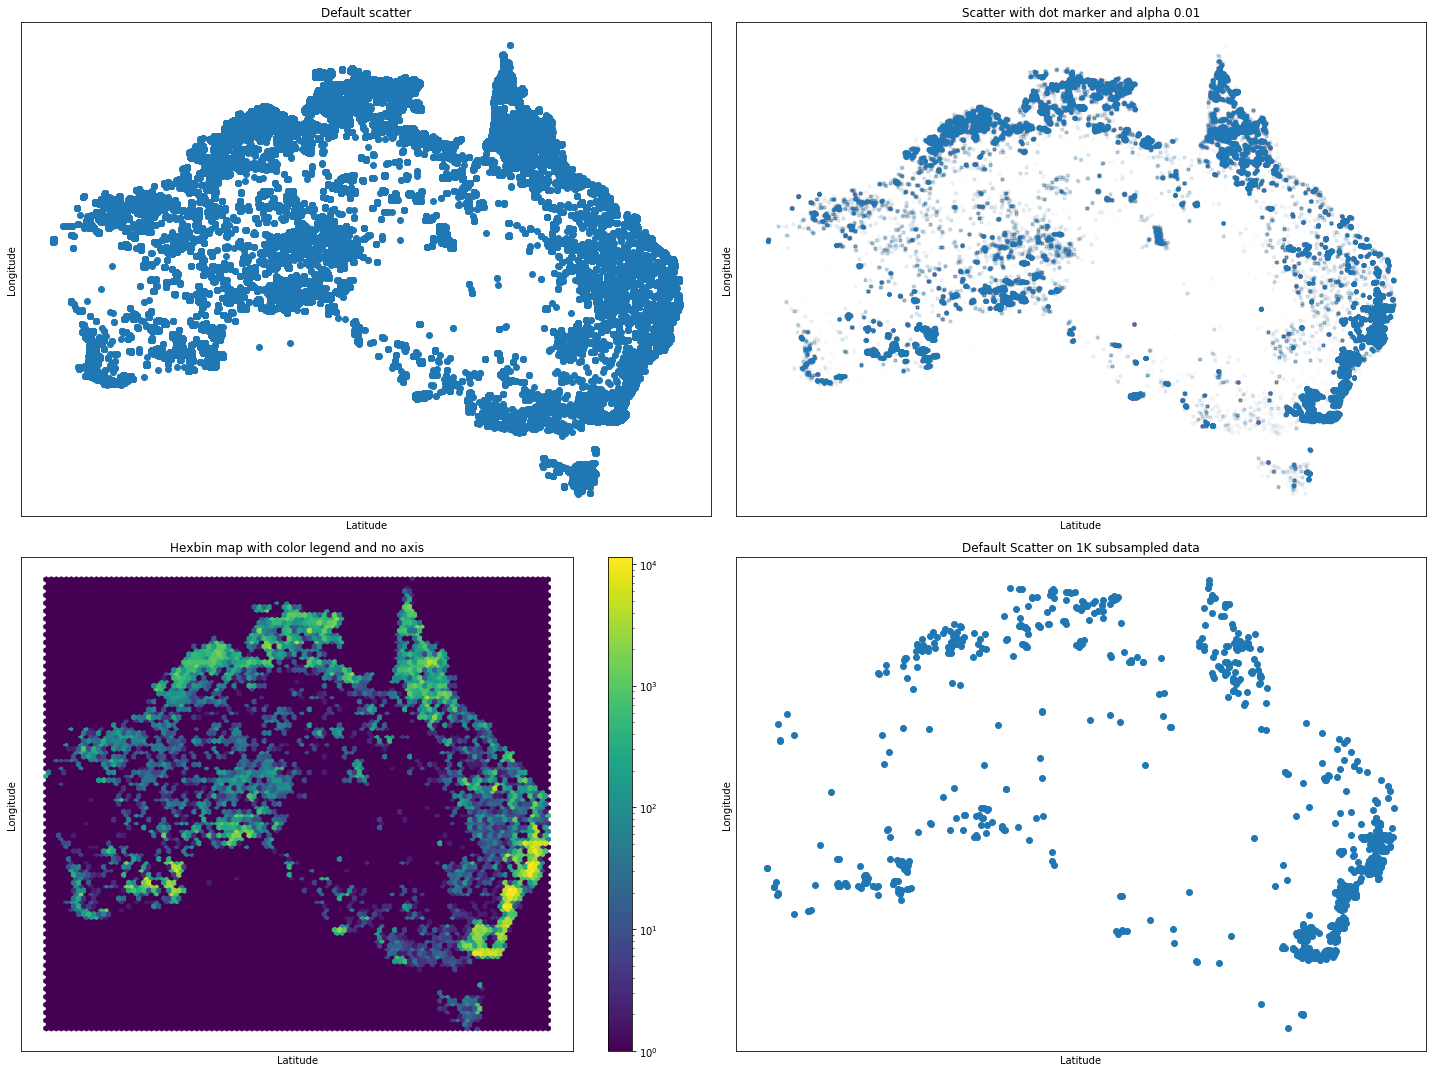

In [7]:
fig, axes = plt.subplots(2,2, figsize =(20,15), subplot_kw={'xticks': (), 'yticks': ()})
axes[0,0].scatter(data.longitude,data.latitude)
axes[0,0].set_title("Default scatter")
axes[0,1].scatter(data.longitude,data.latitude, alpha=0.01, marker=".")
axes[0,1].set_title("Scatter with dot marker and alpha 0.01")
img = axes[1,0].hexbin(data.longitude,data.latitude, bins='log')
axes[1,0].set_title("Hexbin map with color legend and no axis")
axes[1,1].scatter(sample_data.longitude, sample_data.latitude)
axes[1,1].set_title("Default Scatter on 1K subsampled data")
for ax in axes.ravel():
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
plt.tight_layout()
fig.colorbar(img, ax=axes[1,0])
plt.show()

# Create a map

In [8]:
f = folium.Figure(width=1000, height=500)
center_lat = -24.003249 
center_long = 133.737310
m = folium.Map(location=[center_lat,center_long], control_scale=True, zoom_start=4,width=750, height=500,zoom_control=True).add_to(f)
for i in range(0,sample_data.shape[0]):    
    location=[sample_data.iloc[i]['latitude'], sample_data.iloc[i]['longitude']]
    folium.CircleMarker(location,radius=1,color='red').add_to(m)
    
m

Text(0, 0.5, 'Counts')

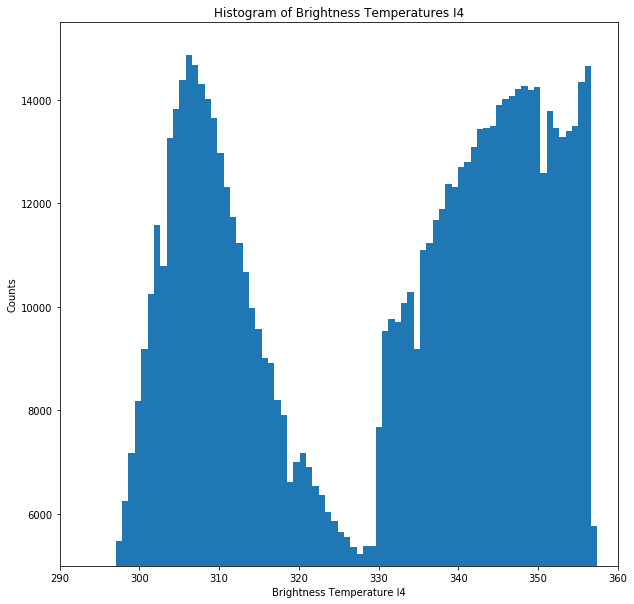

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(data.bright_ti4,bins=200)
ax.set_xlim(290,360)
ax.set_ylim(5000,1.55e4)
ax.set_title("Histogram of Brightness Temperatures I4")
ax.set_xlabel("Brightness Temperature I4")
ax.set_ylabel("Counts")